**QUESTION 1:**

Apply PCA to the images from folder ‘360 Rocks’. How many components do you need to preserve
90% of the variance? [3 points]

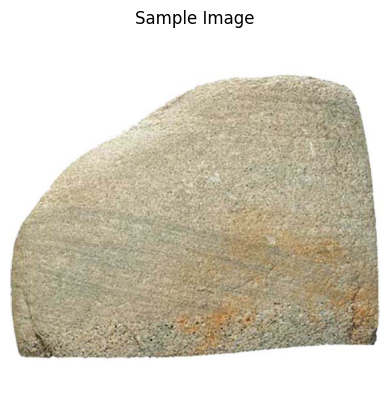

In [26]:
import os
import zipfile
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Define paths
zip_file_path = "/content/360 Rocks.zip"  # Update with your ZIP file name if different
extraction_path = "/content/360_Rocks"  # Folder to extract images

# Step 1: Unzip the dataset
if not os.path.exists(extraction_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)

# Specify the directory containing the images
extracted_file = '360_Rocks'

# Retrieve the list of image files
image_files = os.listdir(extracted_file)

# Select the first image file for visualization
sample_image_path = os.path.join(extracted_file, image_files[0])

# Load the image using PIL
image = Image.open(sample_image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes for a cleaner view
plt.title("Sample Image")
plt.show()

In [28]:
import os

def prepare_output_directory(output_dir):
    """
    Prepares the output directory for storing preprocessed images.
    If the directory doesn't exist, it creates it.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"[INFO] Created output directory: {output_dir}")
    else:
        print(f"[INFO] Output directory already exists: {output_dir}")

# Define input and output directories
input_directory = '360 Rocks'
output_directory = 'grayscale_images'

# Prepare output directory
prepare_output_directory(output_directory)

[INFO] Output directory already exists: grayscale_images


In [33]:
import os
from PIL import Image
import tensorflow as tf

def convert_images_to_grayscale(input_dir, output_dir):
    """
    Converts all images in the input directory to grayscale and saves them in the output directory.

    Args:
    - input_dir: Path to the input directory containing the original images.
    - output_dir: Path to the output directory where grayscale images will be saved.
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"[INFO] Created output directory: {output_dir}")

    # Iterate through each image in the input directory
    for image_file in os.listdir(input_dir):
        try:
            # Construct the full path of the image
            image_path = os.path.join(input_dir, image_file)

            # Skip files that are not images (optional)
            if not image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"[WARNING] Skipping non-image file: {image_file}")
                continue

            # Open the image using PIL
            image = Image.open(image_path)

            # Convert the image to grayscale
            grayscale_image = image.convert('L')

            # Save the grayscale image to the output directory with the same filename
            output_image_path = os.path.join(output_dir, image_file)
            grayscale_image.save(output_image_path)

            print(f"[INFO] Processed and saved: {image_file}")

        except Exception as e:
            print(f"[ERROR] Failed to process {image_file}: {e}")

# Define input and output directories
input_directory = '360_Rocks'
output_directory = 'grayscale_images'

# Call the function to process the images
convert_images_to_grayscale(input_directory, output_directory)

print("[INFO] All images have been processed.")

[INFO] Processed and saved: S_Sandstone_03.jpg
[INFO] Processed and saved: I_Pumice_08.jpg
[INFO] Processed and saved: S_Bituminous Coal_09.jpg
[INFO] Processed and saved: M_Migmatite_10.jpg
[INFO] Processed and saved: I_Peridotite_10.jpg
[INFO] Processed and saved: I_Diorite_08.jpg
[INFO] Processed and saved: S_Conglomerate_06.jpg
[INFO] Processed and saved: M_Quartzite_02.jpg
[INFO] Processed and saved: I_Diorite_01.jpg
[INFO] Processed and saved: I_Peridotite_09.jpg
[INFO] Processed and saved: M_Anthracite_01.jpg
[INFO] Processed and saved: I_Andesite_01.jpg
[INFO] Processed and saved: I_Andesite_02.jpg
[INFO] Processed and saved: I_Gabbro_11.jpg
[INFO] Processed and saved: I_Obsidian_02.jpg
[INFO] Processed and saved: I_Basalt_09.jpg
[INFO] Processed and saved: M_Quartzite_12.jpg
[INFO] Processed and saved: S_Conglomerate_07.jpg
[INFO] Processed and saved: I_Pumice_04.jpg
[INFO] Processed and saved: M_Anthracite_03.jpg
[INFO] Processed and saved: I_Pumice_06.jpg
[INFO] Processed an

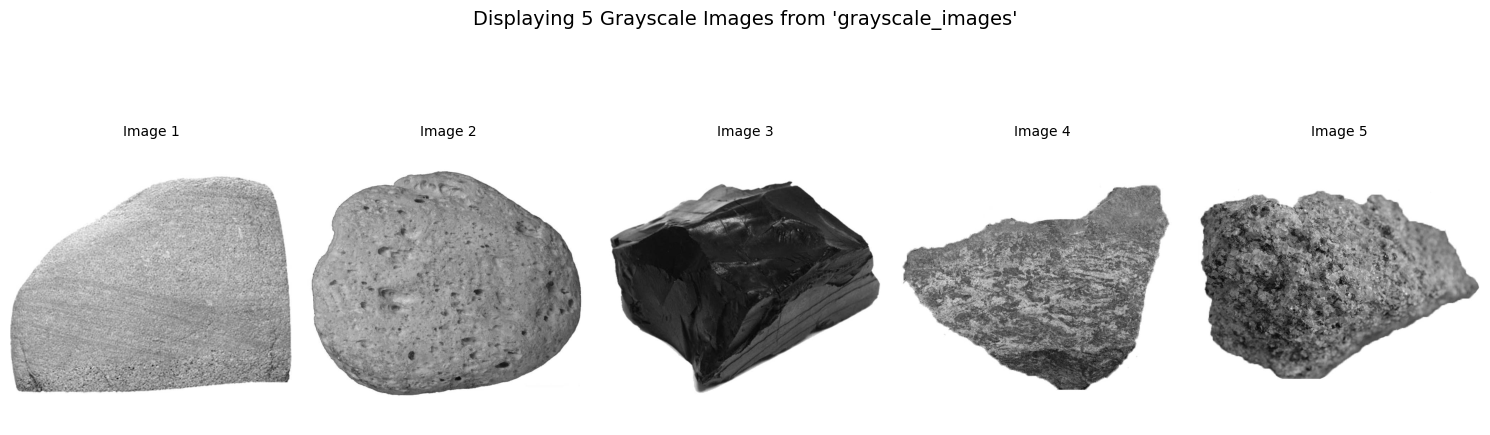

In [77]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_grayscale_images(directory, num_images=5, cmap='gray'):
    """
    Displays a specified number of grayscale images from a given directory.

    Args:
    - directory (str): Path to the directory containing images.
    - num_images (int): Number of images to display (default is 5).
    - cmap (str): Color map for displaying images (default is 'gray').
    """
    # Get a list of image files from the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("[WARNING] No image files found in the directory.")
        return

    # Limit the number of images to display if fewer than requested
    num_images = min(num_images, len(image_files))

    # Create a figure for displaying the images
    plt.figure(figsize=(15, 5))

    for i, image_file in enumerate(image_files[:num_images]):
        # Construct the full path to the image
        image_path = os.path.join(directory, image_file)

        # Load the image using PIL
        image = Image.open(image_path)

        # Display the image in a subplot
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap=cmap)
        plt.axis('off')  # Hide axes for a cleaner look
        plt.title(f"Image {i + 1}", fontsize=10)

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.suptitle(f"Displaying {num_images} Grayscale Images from '{directory}'", fontsize=14, y=1.05)
    plt.show()

# Call the function to display the images
output_directory = 'grayscale_images'
display_grayscale_images(output_directory, num_images=5, cmap='gray')

The number of components required to retain 90% of the variance: 112


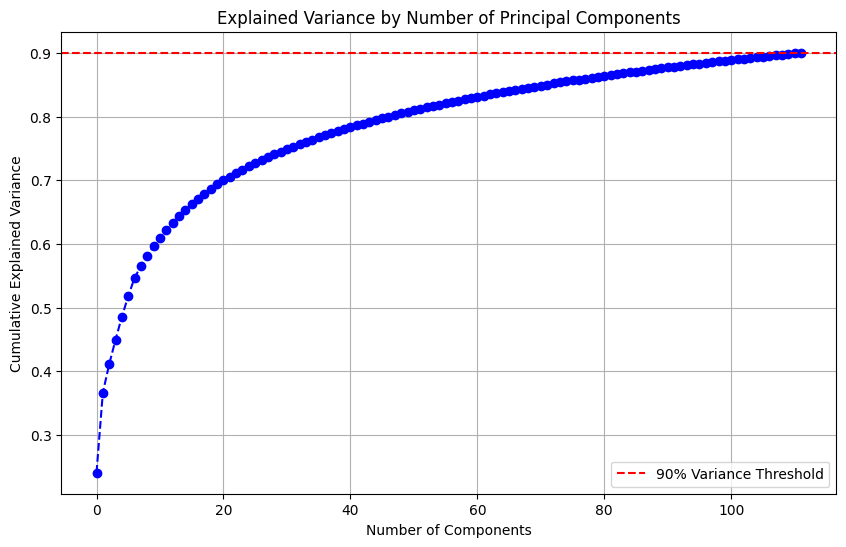

In [38]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_images(directory, image_size=(100, 100)):
    """
    Loads and preprocesses images from the specified directory.

    Args:
    - directory (str): Path to the directory containing images.
    - image_size (tuple): Target size for resizing images (default is 100x100).

    Returns:
    - images_matrix (np.array): Flattened images as a matrix.
    - labels (list): Labels extracted from the image filenames.
    """
    images, labels = [], []

    for image_file in os.listdir(directory):
        image_path = os.path.join(directory, image_file)

        # Open, resize, and convert image to grayscale
        image = Image.open(image_path).convert('L').resize(image_size)

        # Flatten image to a 1D array
        images.append(np.array(image).flatten())

        # Extract label (first letter of filename)
        labels.append(image_file[0])

    return np.array(images), labels

def apply_pca(images_matrix, variance_threshold=0.90):
    """
    Applies PCA to reduce dimensionality while preserving the specified variance.

    Args:
    - images_matrix (np.array): Matrix of flattened images.
    - variance_threshold (float): Proportion of variance to retain (default is 0.90).

    Returns:
    - pca (PCA object): Fitted PCA object.
    - num_components (int): Number of components required to retain the variance.
    """
    pca = PCA(variance_threshold)
    pca.fit(images_matrix)
    num_components = pca.n_components_
    return pca, num_components

def plot_explained_variance(pca):
    """
    Plots the cumulative explained variance as a function of the number of PCA components.

    Args:
    - pca (PCA object): Fitted PCA object.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
    plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance Threshold')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Principal Components')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Parameters
output_directory = 'grayscale_images'
image_size = (100, 100)

# Step 1: Load and preprocess images
images_matrix, labels = load_images(output_directory, image_size)

# Step 2: Apply PCA to preserve 90% of the variance
pca_90, num_components_90 = apply_pca(images_matrix, variance_threshold=0.90)
print(f"The number of components required to retain 90% of the variance: {num_components_90}")

# Step 3: Visualize the explained variance
plot_explained_variance(pca_90)

**QUESTION 2:**

Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction
(projection in the original space) after you kept 90% of variance using PCA. [3 points]

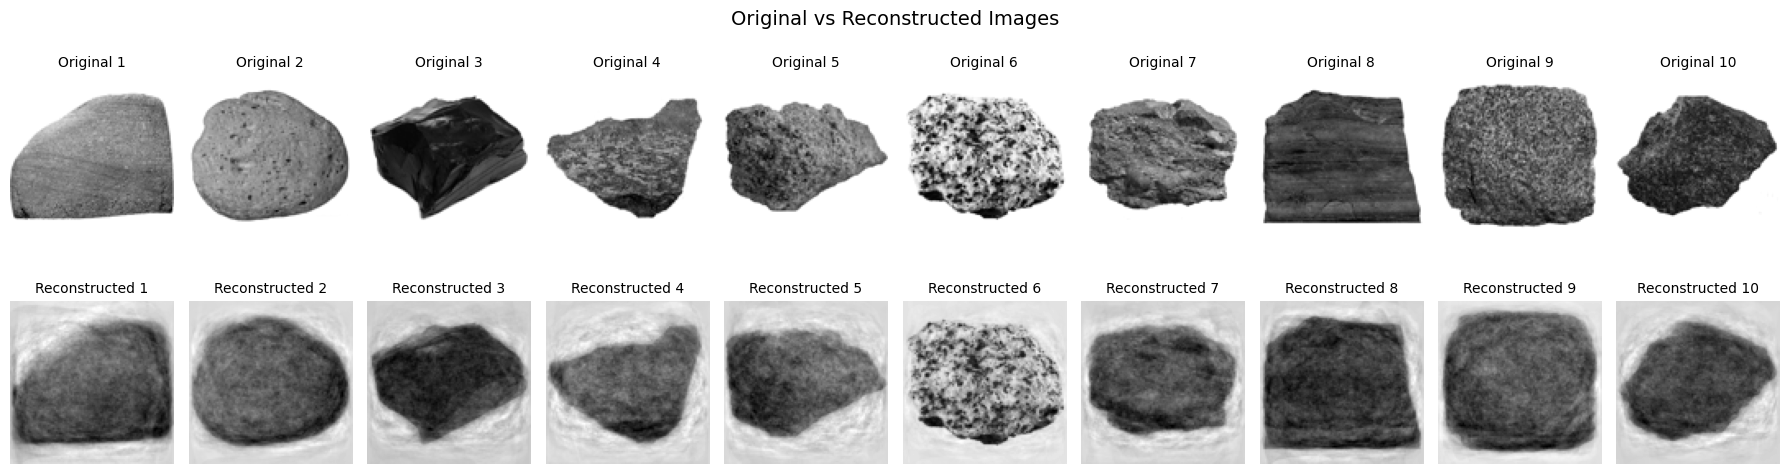

In [78]:
def display_original_vs_reconstructed(images, reconstructed, image_size, num_images=10, cmap='gray'):
    """
    Displays original and reconstructed images side by side.

    Args:
    - images (np.array): Original images (flattened).
    - reconstructed (np.array): Reconstructed images (flattened).
    - image_size (tuple): Size of the images (height, width).
    - num_images (int): Number of images to display (default is 10).
    - cmap (str): Color map for displaying images (default is 'gray').
    """
    # Ensure the number of images does not exceed available data
    num_images = min(num_images, len(images))

    # Create a figure for displaying the images
    fig, axes = plt.subplots(2, num_images, figsize=(18, 5))

    for i in range(num_images):
        # Display the original image in the first row
        axes[0, i].imshow(images[i].reshape(image_size), cmap=cmap)
        axes[0, i].axis('off')  # Turn off the axes
        axes[0, i].set_title(f"Original {i + 1}", fontsize=10)

        # Display the reconstructed image in the second row
        axes[1, i].imshow(reconstructed[i].reshape(image_size), cmap=cmap)
        axes[1, i].axis('off')  # Turn off the axes
        axes[1, i].set_title(f"Reconstructed {i + 1}", fontsize=10)

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.suptitle("Original vs Reconstructed Images", fontsize=14, y=1.02)
    plt.show()


# Number of images to display
num_images_to_display = 10

# Select the first N images from the dataset
selected_images = images_matrix[:num_images_to_display]

# Reconstruct images using PCA
reconstructed_images = pca_90.inverse_transform(pca_90.transform(selected_images))

# Display the images
display_original_vs_reconstructed(selected_images, reconstructed_images, image_size, num_images=num_images_to_display, cmap='gray')

**QUESTION 3:**

Each of the images belongs to one of three rock categories. The category is indicated by the first
letter in the filename (I, M and S). We will now try to see if the visualization can help us identify
different clusters.
1. Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components? [2 points].
2. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add
some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data (your visualization should
look similar to the one after line 71 in this file https://github.com/ageron/handsonml3/blob/main/08_dimensionality_reduction.ipynbLinks to an external site. but with images of rocks instead of MNIST digits). Repeat the process and create the same type of plots
for t-SNE, LLE and MDS. [6 points]
3. Discuss your observations. [1 point]

In [40]:
from sklearn.decomposition import PCA
import numpy as np

def reduce_to_2_components(data):
    """
    Reduces the dimensionality of the given dataset to 2 components using PCA
    and calculates the explained variance.

    Args:
    - data (np.array): The input data (e.g., flattened images).

    Returns:
    - pca (PCA object): Fitted PCA model.
    - reduced_data (np.array): Data reduced to 2 dimensions.
    - explained_variance (float): Total variance explained by the 2 components.
    """
    # Apply PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Calculate the variance explained by the first two components
    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"[INFO] Variance explained by the first two components: {explained_variance:.2%}")

    return pca, reduced_data, explained_variance


# Reduce dimensionality of the dataset
pca_2d, pca_data, explained_variance = reduce_to_2_components(images_matrix)

# Optionally, log explained variance
print(f"[INFO] PCA 2D Explained Variance: {explained_variance:.2%}")

[INFO] Variance explained by the first two components: 36.66%
[INFO] PCA 2D Explained Variance: 36.66%


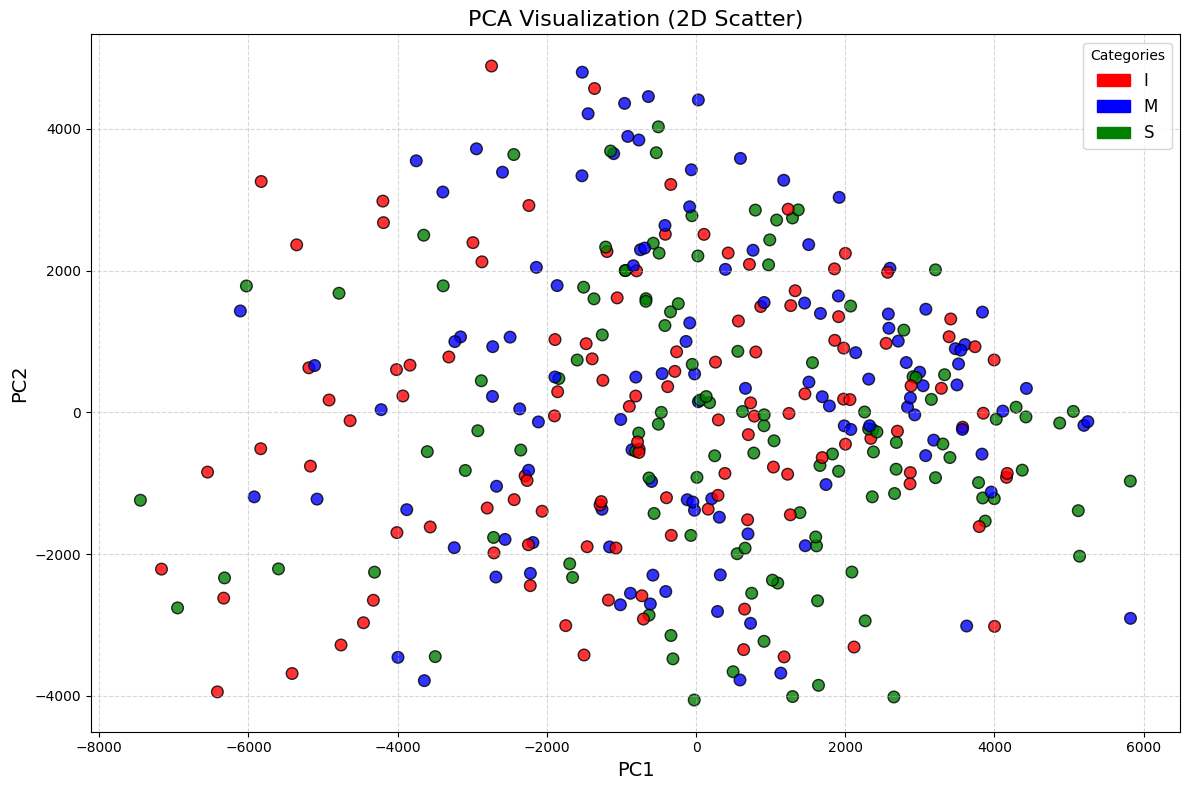

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_pca_scatter(data, labels, categories, title="PCA Visualization (2D Scatter)"):
    """
    Plots a 2D scatter plot of PCA-reduced data with color-coded categories.

    Args:
    - data (np.array): PCA-reduced data with 2 components.
    - labels (list): Labels for each data point.
    - categories (dict): Mapping of labels to colors (e.g., {'I': 'red', 'M': 'blue', 'S': 'green'}).
    - title (str): Title of the plot (default is "PCA Visualization (2D Scatter)").
    """
    # Map labels to colors based on categories
    colors = [categories[label] for label in labels]

    # Create the scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.8, edgecolors='k', s=70)

    # Add axis labels and title
    plt.title(title, fontsize=16)
    plt.xlabel("PC1", fontsize=14)
    plt.ylabel("PC2", fontsize=14)

    # Create and add legend
    legend_patches = [mpatches.Patch(color=color, label=category) for category, color in categories.items()]
    plt.legend(handles=legend_patches, title="Categories", loc="best", fontsize=12)

    # Improve layout and show the plot
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Define category-to-color mapping
categories = {'I': 'red', 'M': 'blue', 'S': 'green'}

# Plot the PCA scatter plot
plot_pca_scatter(pca_data, labels, categories)

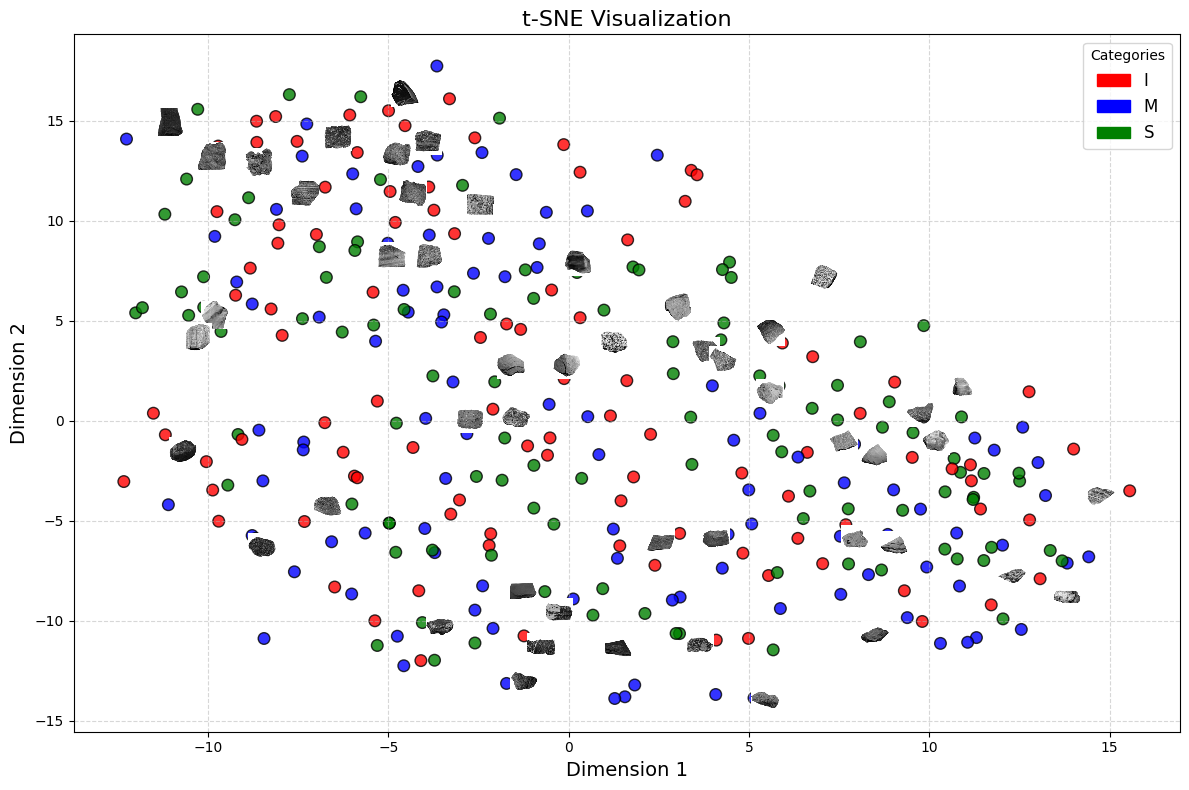

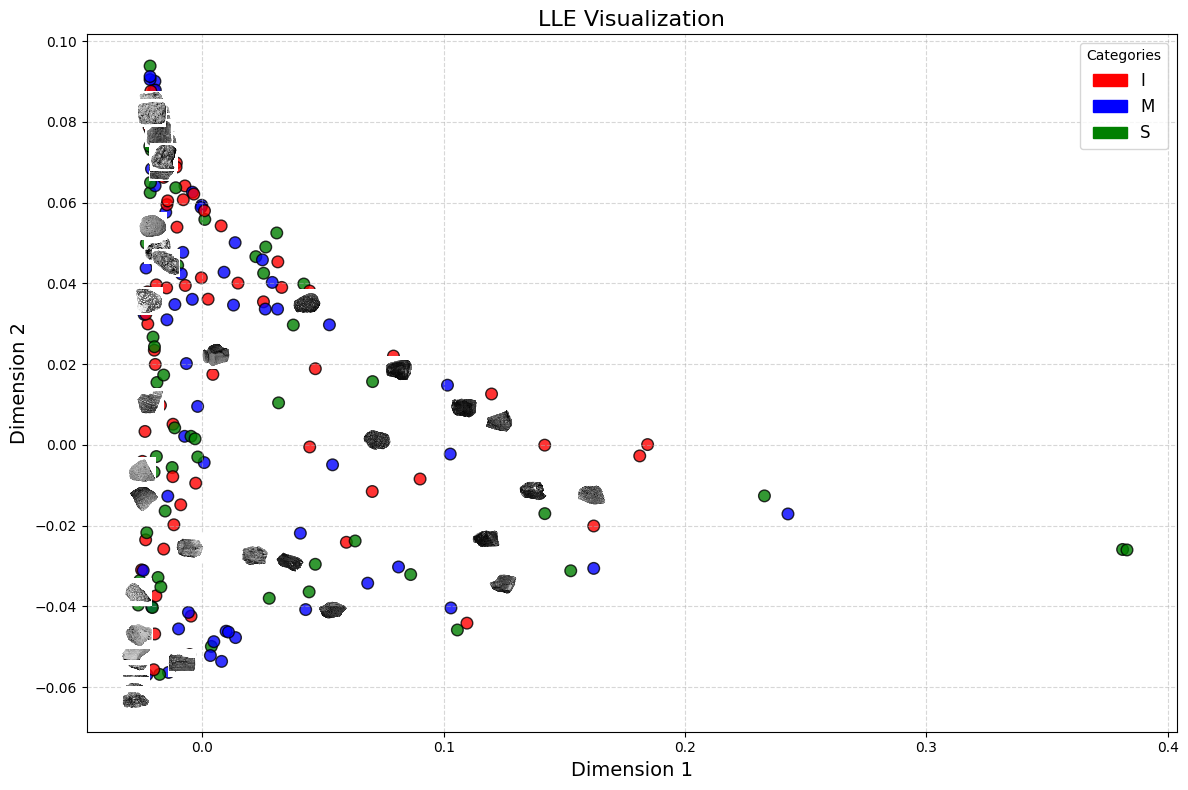

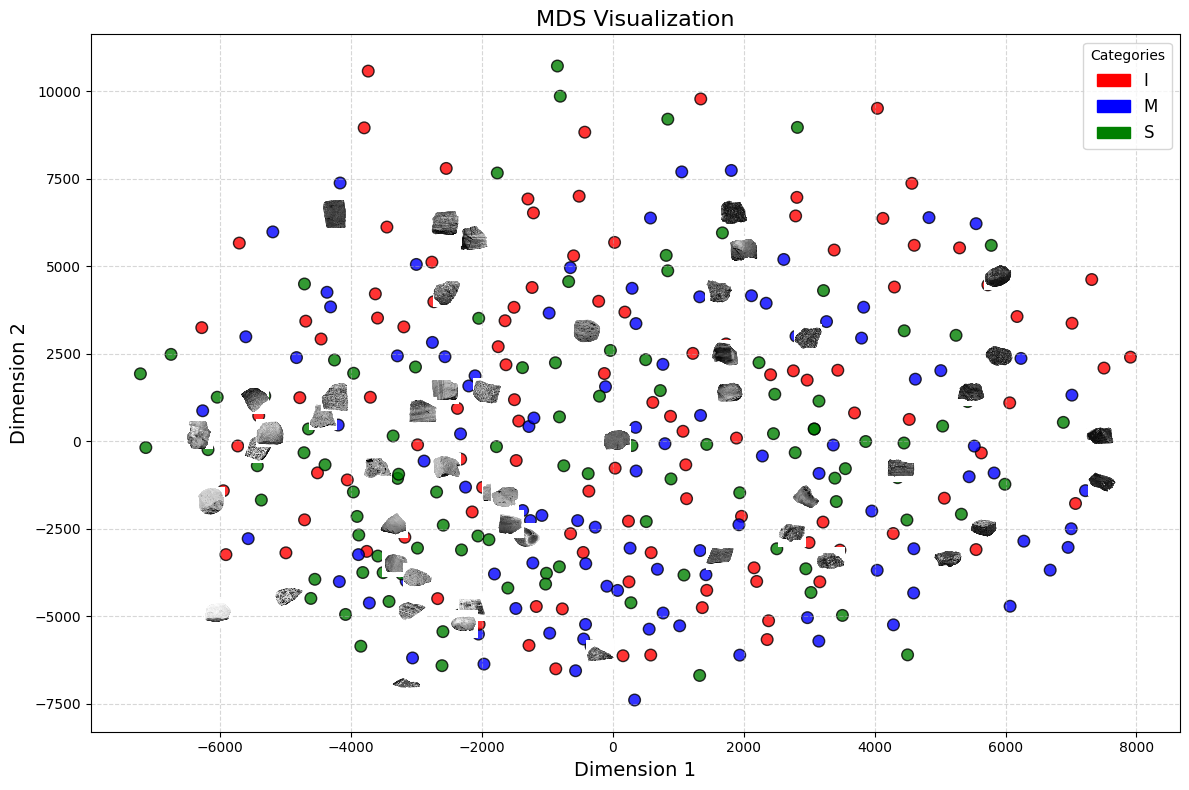

In [43]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

def scatter_plot_with_images(data, labels, categories, images, image_size, title, cmap='gray', zoom=0.2):
    """
    Creates a 2D scatter plot with optional thumbnail images overlaid.

    Args:
    - data (np.array): Reduced data (2D array).
    - labels (list): Labels for data points.
    - categories (dict): Mapping of labels to colors.
    - images (np.array): Original images corresponding to the data points.
    - image_size (tuple): Dimensions of the images (height, width).
    - title (str): Title of the scatter plot.
    - cmap (str): Color map for thumbnail images (default is 'gray').
    - zoom (float): Zoom factor for thumbnail images (default is 0.2).
    """
    # Map labels to colors
    colors = [categories[label] for label in labels]

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.8, edgecolors='k', s=70)
    plt.title(title, fontsize=16)
    plt.xlabel("Dimension 1", fontsize=14)
    plt.ylabel("Dimension 2", fontsize=14)

    # Create legend
    legend_patches = [mpatches.Patch(color=color, label=category) for category, color in categories.items()]
    plt.legend(handles=legend_patches, title="Categories", loc="best", fontsize=12)

    # Overlay thumbnail images for a random subset of points
    subset_indices = np.random.choice(len(data), size=min(50, len(data)), replace=False)
    for idx in subset_indices:
        x, y = data[idx]
        image_array = images[idx].reshape(image_size)
        image = OffsetImage(image_array, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(image, (x, y), frameon=False)
        plt.gca().add_artist(ab)

    # Adjust layout and show plot
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Define category-to-color mapping
categories = {'I': 'red', 'M': 'blue', 'S': 'green'}

# Step 4: t-SNE
tsne = TSNE(n_components=2, init="random", learning_rate="auto")
tsne_data = tsne.fit_transform(images_matrix)
scatter_plot_with_images(tsne_data, labels, categories, images_matrix, image_size, "t-SNE Visualization")

# Step 4: LLE
lle = LocallyLinearEmbedding(n_components=2)
lle_data = lle.fit_transform(images_matrix)
scatter_plot_with_images(lle_data, labels, categories, images_matrix, image_size, "LLE Visualization")

# Step 4: MDS
mds = MDS(n_components=2)
mds_data = mds.fit_transform(images_matrix)
scatter_plot_with_images(mds_data, labels, categories, images_matrix, image_size, "MDS Visualization")


### Discussion

The visualizations of the dimensionality reduction techniques, namely **t-SNE**, **Locally Linear Embedding (LLE)**, and **Multidimensional Scaling (MDS)**, provide valuable insights into the distribution and structure of the dataset.

#### 1. **t-SNE Visualization**
The t-SNE plot reveals well-separated clusters, indicating the method's ability to preserve the local structure of the data. The categories "I," "M," and "S" (represented in red, blue, and green, respectively) show clear groupings. However, there is some degree of overlap, especially in the transition zones between clusters. The integration of thumbnail images adds interpretability, allowing us to visually assess the patterns within the clusters. The clustering demonstrates that t-SNE effectively captures the nonlinear relationships in the high-dimensional data and maps them to a meaningful 2D representation.

#### 2. **Locally Linear Embedding (LLE) Visualization**
The LLE visualization highlights a linear manifold structure with a more continuous distribution of points along certain dimensions. This technique effectively retains the local relationships within the data, as evidenced by the relatively smooth transitions between clusters. However, the separation between the three categories ("I," "M," and "S") is less distinct compared to t-SNE. This suggests that while LLE preserves local geometries, it may not handle global separations as effectively as t-SNE. The inclusion of thumbnail images further illustrates the spatial distribution of similar images.

#### 3. **MDS Visualization**
The MDS plot provides a global perspective of the data distribution. The clusters are loosely formed, with noticeable overlaps among the categories. MDS focuses on preserving the pairwise distances between data points, which explains the less compact grouping observed here. While the technique offers insights into the overall structure of the data, it might not capture the inherent nonlinear patterns as effectively as t-SNE or LLE. Nevertheless, the integration of thumbnail images aids in contextualizing the data points within their respective clusters.

### Comparative Analysis
- **t-SNE** excels in creating well-separated and interpretable clusters, making it a preferred choice for visualizing high-dimensional data with nonlinear relationships.
- **LLE** maintains local continuity and transitions but may struggle with distinct global separations between categories.
- **MDS** provides a broader, pairwise distance-preserving visualization but shows less compactness and separation of clusters.

### Conclusion
Each dimensionality reduction technique offers unique advantages and limitations. t-SNE stands out for its strong performance in clustering and visualization, while LLE provides a balance between local and global structure preservation. MDS, though less effective in cluster separation, offers a complementary perspective of the dataset. The incorporation of thumbnail images in the visualizations enhances interpretability and bridges the gap between numerical representation and visual inspection. These visualizations collectively provide a holistic understanding of the dataset's underlying structure.

**QUESTION 4:**

Now let's see if these dimensionality reduction techniques can give us similar features to those
that humans use to judge the images. File mds_360.txt contains 8 features for each of the
images (rankings are in the same order as the images in ‘360 Rocks’ folder. Run PCA,
LLE and MDS to reduce the dimensionality of the images to 8. Then, compare those image embeddings with the ones from humans that are in the mds_360.txt file. Use Procrustes
analysis to do the comparison (here is one example of how to do that mtx1, mtx2, disparity = procrustes(matrix_with_human_data, matrix_with_pca_embeddings_data). Here matrix_with_human_data and matrix_with_pca_embeddings_data should be 360 by 8. disparity
will tell you the difference in the data. Report disparity for each of the three dimensionality reduction methods. Compute the correlation coefficient between each dimension of mtx1 and mtx2 for
each of the three methods - display results in a table. [7 points]


In [44]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, MDS
from scipy.spatial import procrustes
from scipy.stats import pearsonr

def load_human_data(filepath):
    """
    Load human-generated data from a file.

    Args:
    - filepath (str): Path to the file containing human data.

    Returns:
    - np.array: Loaded human data.
    """
    try:
        data = np.loadtxt(filepath)
        print(f"[INFO] Loaded human data with shape {data.shape}")
        return data
    except Exception as e:
        print(f"[ERROR] Failed to load human data: {e}")
        raise

def reduce_dimensionality(method, data, n_components=8):
    """
    Reduce dimensionality using a specified method.

    Args:
    - method (str): Dimensionality reduction method ('PCA', 'LLE', 'MDS').
    - data (np.array): Input high-dimensional data.
    - n_components (int): Number of components to reduce to.

    Returns:
    - np.array: Reduced data.
    """
    if method == "PCA":
        reducer = PCA(n_components=n_components)
    elif method == "LLE":
        reducer = LocallyLinearEmbedding(n_components=n_components)
    elif method == "MDS":
        reducer = MDS(n_components=n_components)
    else:
        raise ValueError(f"[ERROR] Unknown method: {method}")

    reduced_data = reducer.fit_transform(data)
    print(f"[INFO] {method} reduced data to shape {reduced_data.shape}")
    return reduced_data

def perform_procrustes_and_correlation(human_data, machine_data, method_name):
    """
    Perform Procrustes analysis and compute correlations.

    Args:
    - human_data (np.array): Human-generated data.
    - machine_data (np.array): Machine-generated embeddings.
    - method_name (str): Dimensionality reduction method name.

    Returns:
    - disparity (float): Disparity measure.
    - correlations (list): Pearson correlation coefficients for each dimension.
    """
    mtx1, mtx2, disparity = procrustes(human_data, machine_data)
    correlations = [pearsonr(mtx1[:, i], mtx2[:, i])[0] for i in range(mtx1.shape[1])]

    print(f"[INFO] {method_name} - Disparity: {disparity:.6f}")
    return disparity, correlations

def summarize_results(human_data, machine_data, methods, n_components=8):
    """
    Summarize Procrustes analysis results for multiple methods.

    Args:
    - human_data (np.array): Human-generated data.
    - machine_data (np.array): High-dimensional machine-generated data.
    - methods (list): List of dimensionality reduction methods ('PCA', 'LLE', 'MDS').
    - n_components (int): Number of components for dimensionality reduction.

    Returns:
    - pd.DataFrame: Correlation table.
    - dict: Disparity values for each method.
    """
    results = {}
    for method in methods:
        # Dimensionality reduction
        reduced_data = reduce_dimensionality(method, machine_data, n_components)

        # Procrustes analysis and correlation
        disparity, correlations = perform_procrustes_and_correlation(human_data, reduced_data, method)
        results[method] = {"disparity": disparity, "correlations": correlations}

    # Prepare correlation table
    correlation_table = pd.DataFrame({
        "Dimension": range(1, n_components + 1),
        **{method: results[method]["correlations"] for method in methods}
    })

    # Extract disparities
    disparities = {method: results[method]["disparity"] for method in methods}

    return correlation_table, disparities


# Load human-generated data
human_data_path = 'mds_360.txt'
human_data = load_human_data(human_data_path)

# Example machine-generated data (replace with your actual data)
machine_data = images_matrix  # Placeholder

# Analyze dimensionality reduction methods
methods = ["PCA", "LLE", "MDS"]
correlation_table, disparity_summary = summarize_results(human_data, machine_data, methods)

# Display correlation table
print("\n[INFO] Correlation Table:")
print(correlation_table)

# Display disparity summary
print("\n[INFO] Disparity Summary:")
for method, disparity in disparity_summary.items():
    print(f"  {method}: {disparity:.6f}")

# Save results to a CSV
correlation_table.to_csv("procrustes_analysis_results.csv", index=False)


[INFO] Loaded human data with shape (360, 8)
[INFO] PCA reduced data to shape (360, 8)
[INFO] PCA - Disparity: 0.982333
[INFO] LLE reduced data to shape (360, 8)
[INFO] LLE - Disparity: 0.980441
[INFO] MDS reduced data to shape (360, 8)
[INFO] MDS - Disparity: 0.980831

[INFO] Correlation Table:
   Dimension       PCA       LLE       MDS
0          1  0.153266  0.152283  0.174830
1          2  0.125199  0.173560  0.100824
2          3  0.147213  0.100436  0.149437
3          4  0.106708  0.143847  0.112578
4          5  0.126954  0.071959  0.160075
5          6  0.160074  0.219543  0.151166
6          7  0.129249  0.153222  0.124913
7          8  0.105631  0.077571  0.137812

[INFO] Disparity Summary:
  PCA: 0.982333
  LLE: 0.980441
  MDS: 0.980831


**QUESTION 5:**

Cluster the 360 images using K-Means.

1. You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance.
Determine the number of clusters using one of the techniques we discussed in class. [4 points]

2. Set the number of clusters to 3 and report clustering accuracy. [4 points]


Reduced dimensionality to: 112 components


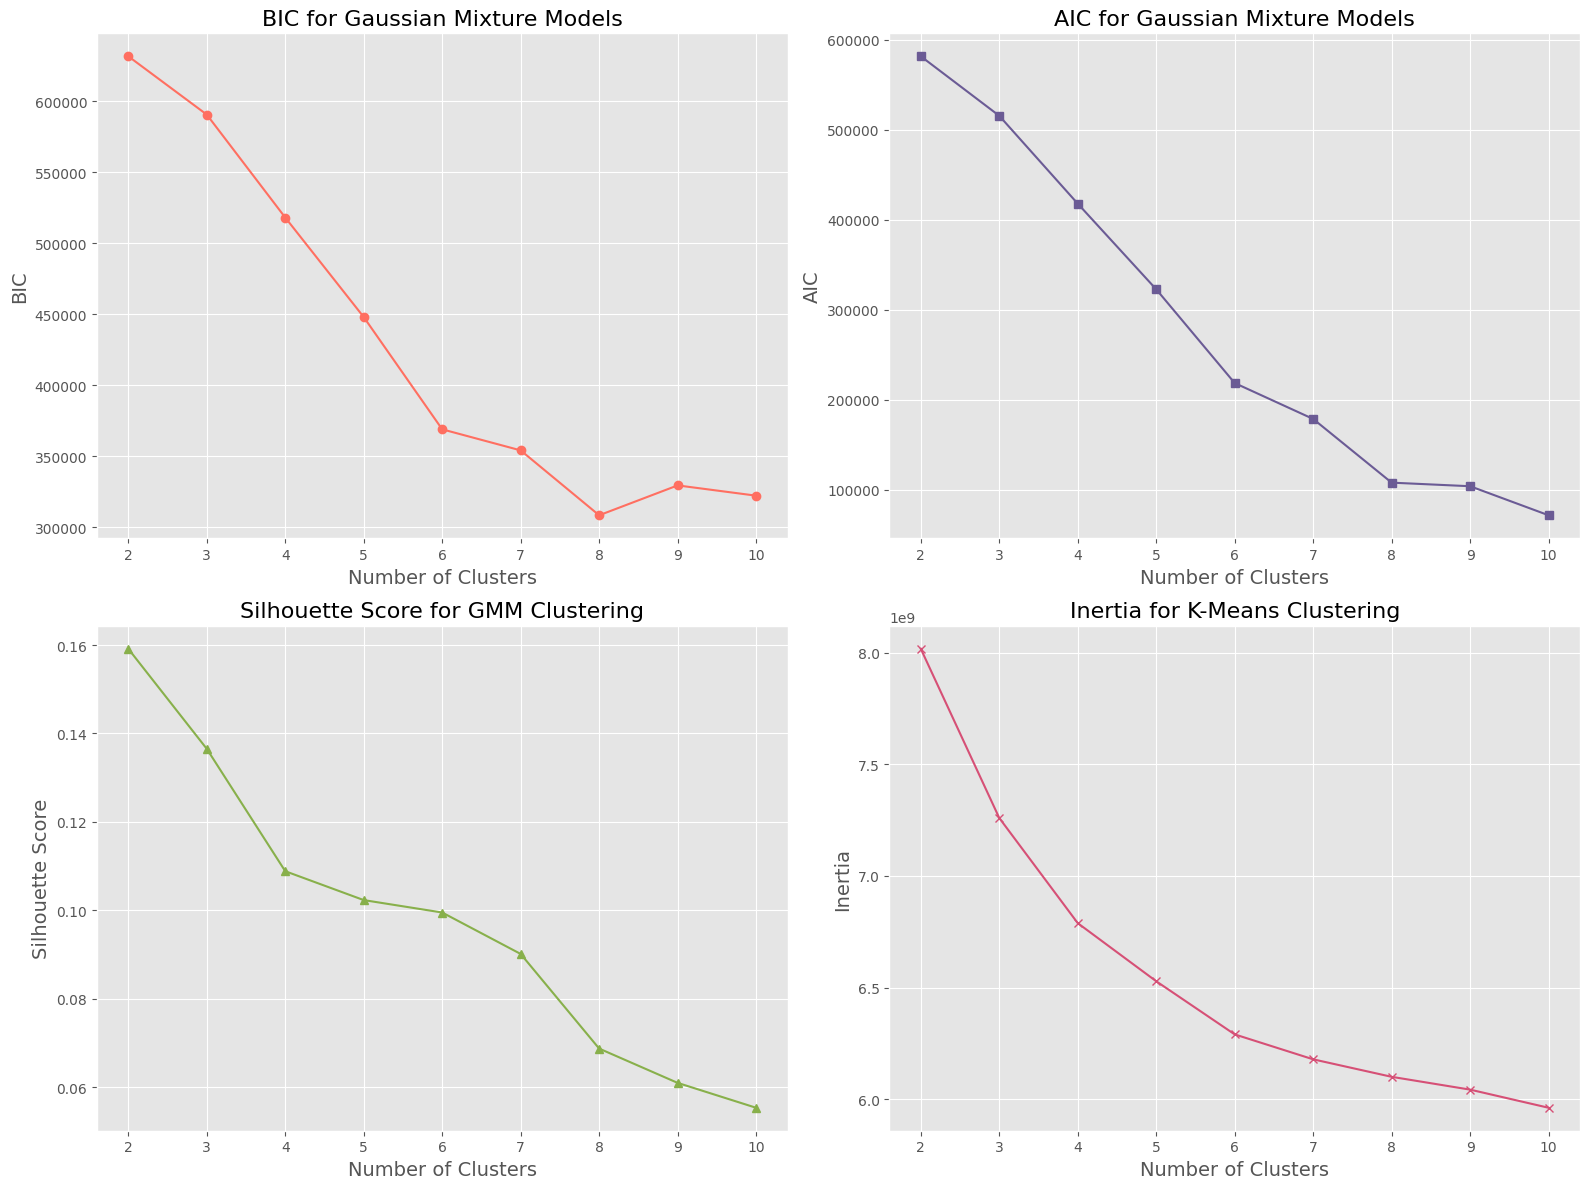

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def compute_clustering_metrics(reduced_data, num_clusters):
    """
    Compute clustering metrics for Gaussian Mixture Model and K-Means.

    Args:
    - reduced_data (np.array): Data after dimensionality reduction.
    - num_clusters (range): Range of cluster sizes to evaluate.

    Returns:
    - metrics (dict): Dictionary containing BIC, AIC, Silhouette scores for GMM, and inertia for K-Means.
    """
    bic_values, aic_values, silhouette_scores, inertia_values = [], [], [], []

    for n_clusters in num_clusters:
        # Gaussian Mixture Model (GMM)
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm.fit(reduced_data)

        # Append BIC and AIC
        bic_values.append(gmm.bic(reduced_data))
        aic_values.append(gmm.aic(reduced_data))

        # Append Silhouette Score
        cluster_labels = gmm.predict(reduced_data)
        silhouette_scores.append(silhouette_score(reduced_data, cluster_labels))

        # K-Means Inertia
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(reduced_data)
        inertia_values.append(kmeans.inertia_)

    return {
        "BIC": bic_values,
        "AIC": aic_values,
        "Silhouette": silhouette_scores,
        "Inertia": inertia_values,
    }

def plot_clustering_metrics(num_clusters, metrics):
    """
    Plot clustering metrics for Gaussian Mixture Model and K-Means.

    Args:
    - num_clusters (range): Range of cluster sizes.
    - metrics (dict): Dictionary of clustering metrics.
    """
    plt.style.use('ggplot')  # Use a modern style
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Define colors for each plot
    colors = ['#FF6F61', '#6B5B95', '#88B04B', '#D65076']

    # BIC Plot
    axes[0, 0].plot(num_clusters, metrics["BIC"], marker='o', linestyle='-', color=colors[0])
    axes[0, 0].set_title('BIC for Gaussian Mixture Models', fontsize=16)
    axes[0, 0].set_xlabel('Number of Clusters', fontsize=14)
    axes[0, 0].set_ylabel('BIC', fontsize=14)
    axes[0, 0].grid(True)

    # AIC Plot
    axes[0, 1].plot(num_clusters, metrics["AIC"], marker='s', linestyle='-', color=colors[1])
    axes[0, 1].set_title('AIC for Gaussian Mixture Models', fontsize=16)
    axes[0, 1].set_xlabel('Number of Clusters', fontsize=14)
    axes[0, 1].set_ylabel('AIC', fontsize=14)
    axes[0, 1].grid(True)

    # Silhouette Score Plot
    axes[1, 0].plot(num_clusters, metrics["Silhouette"], marker='^', linestyle='-', color=colors[2])
    axes[1, 0].set_title('Silhouette Score for GMM Clustering', fontsize=16)
    axes[1, 0].set_xlabel('Number of Clusters', fontsize=14)
    axes[1, 0].set_ylabel('Silhouette Score', fontsize=14)
    axes[1, 0].grid(True)

    # Inertia Plot
    axes[1, 1].plot(num_clusters, metrics["Inertia"], marker='x', linestyle='-', color=colors[3])
    axes[1, 1].set_title('Inertia for K-Means Clustering', fontsize=16)
    axes[1, 1].set_xlabel('Number of Clusters', fontsize=14)
    axes[1, 1].set_ylabel('Inertia', fontsize=14)
    axes[1, 1].grid(True)

    # Adjust layout for better spacing
    fig.tight_layout()
    plt.show()

# Step 1: Dimensionality reduction with PCA to retain 90% variance
pca = PCA(n_components=0.90, random_state=42)
reduced_data = pca.fit_transform(images_matrix)  # Replace 'images_matrix' with your dataset
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Step 2: Define range of clusters and compute metrics
num_clusters = range(2, 11)
metrics = compute_clustering_metrics(reduced_data, num_clusters)

# Step 3: Plot clustering metrics
plot_clustering_metrics(num_clusters, metrics)

Clustering Accuracy (K-Means, 3 Clusters): 0.30
Silhouette Score (K-Means, 3 Clusters): 0.14


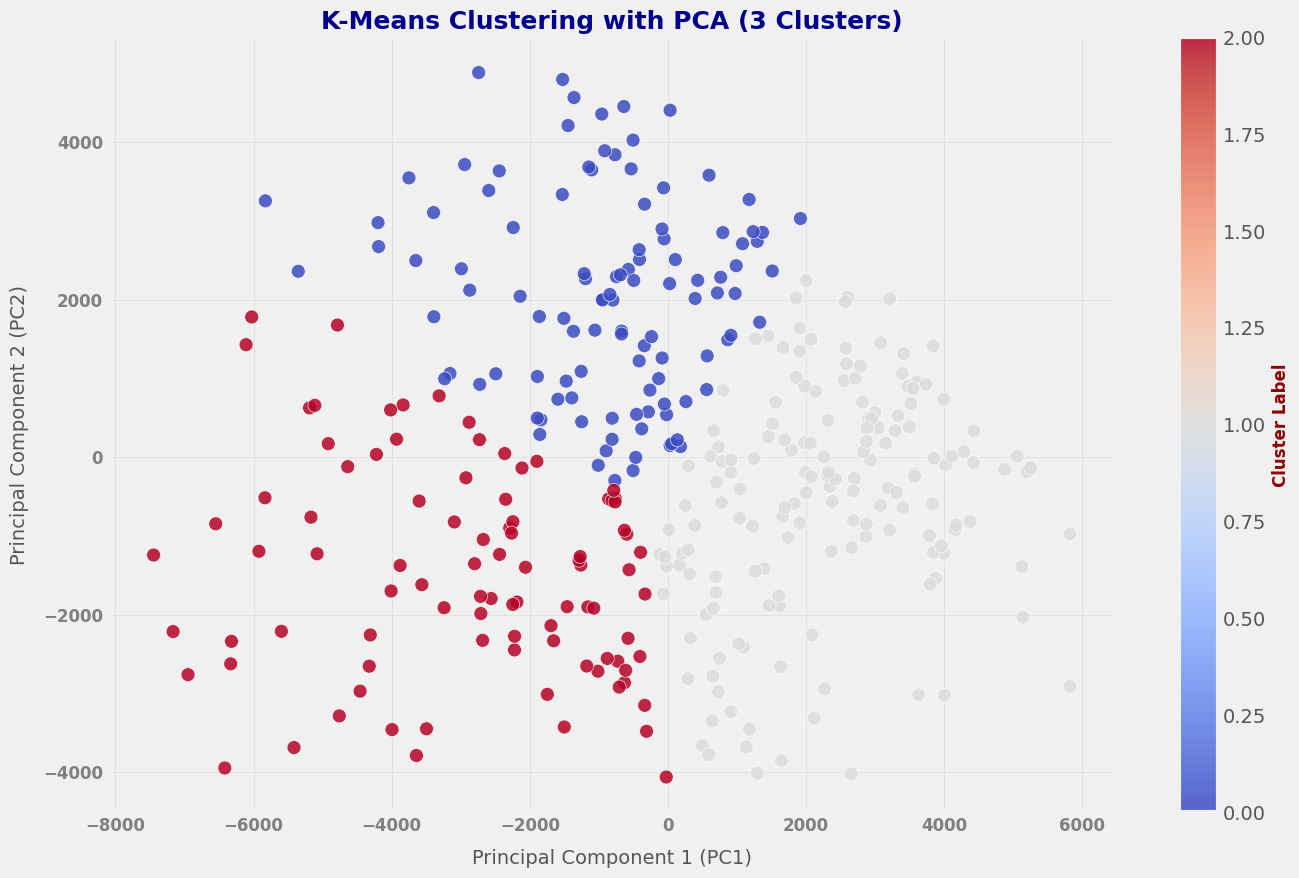

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 5: Cluster with 3 clusters (based on the question)
n_clusters = 3

# Apply K-Means for 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Optional: Evaluate clustering accuracy
# Assuming `true_labels` contains the ground truth labels ('I', 'M', 'S') for the images
# Replace `filenames` or `true_labels` with your actual label data
true_labels = labels  # Extract labels from filenames
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(true_labels)  # Convert to numerical labels

# Compute clustering accuracy (mapping required for unsupervised labels)
accuracy = accuracy_score(encoded_true_labels, kmeans_labels)
print(f"Clustering Accuracy (K-Means, 3 Clusters): {accuracy:.2f}")

# Optional: Silhouette Score for 3 clusters
silhouette_avg = silhouette_score(reduced_data, kmeans_labels)
print(f"Silhouette Score (K-Means, 3 Clusters): {silhouette_avg:.2f}")

# Step 6: Visualize clustering results in 2D space with improved design
plt.style.use('fivethirtyeight')  # Apply a professional style
plt.figure(figsize=(14, 9))

# Scatter plot
scatter = plt.scatter(
    reduced_data[:, 0], reduced_data[:, 1],
    c=kmeans_labels, cmap='coolwarm', alpha=0.85, edgecolors='white', s=100
)

# Titles and labels
plt.title("K-Means Clustering with PCA (3 Clusters)", fontsize=18, weight='bold', color='darkblue')
plt.xlabel("Principal Component 1 (PC1)", fontsize=14, labelpad=10)
plt.ylabel("Principal Component 2 (PC2)", fontsize=14, labelpad=10)

# Add colorbar with improved label
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster Label", fontsize=12, weight='bold', color='darkred')

# Custom gridlines
plt.grid(color='lightgray', linestyle='-', linewidth=0.7, alpha=0.5)

# Customizing axes ticks
plt.xticks(fontsize=12, weight='bold', color='gray')
plt.yticks(fontsize=12, weight='bold', color='gray')

# Display the plot
plt.tight_layout()
plt.show()

**QUESTION 6:**

Cluster the 360 images using EM.
1. You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the
variance. Determine the number of clusters using one of the techniques we discussed in class. [4
points]
2. Set the number of clusters to 3 and report clustering accuracy. [4 points]
3. Use the model to generate 20 new rocks (using the sample() method), and visualize them in the
original image space (since you used PCA, you will need to use its inverse_transform() method).
[4 points]

Reduced dimensionality to: 112 components


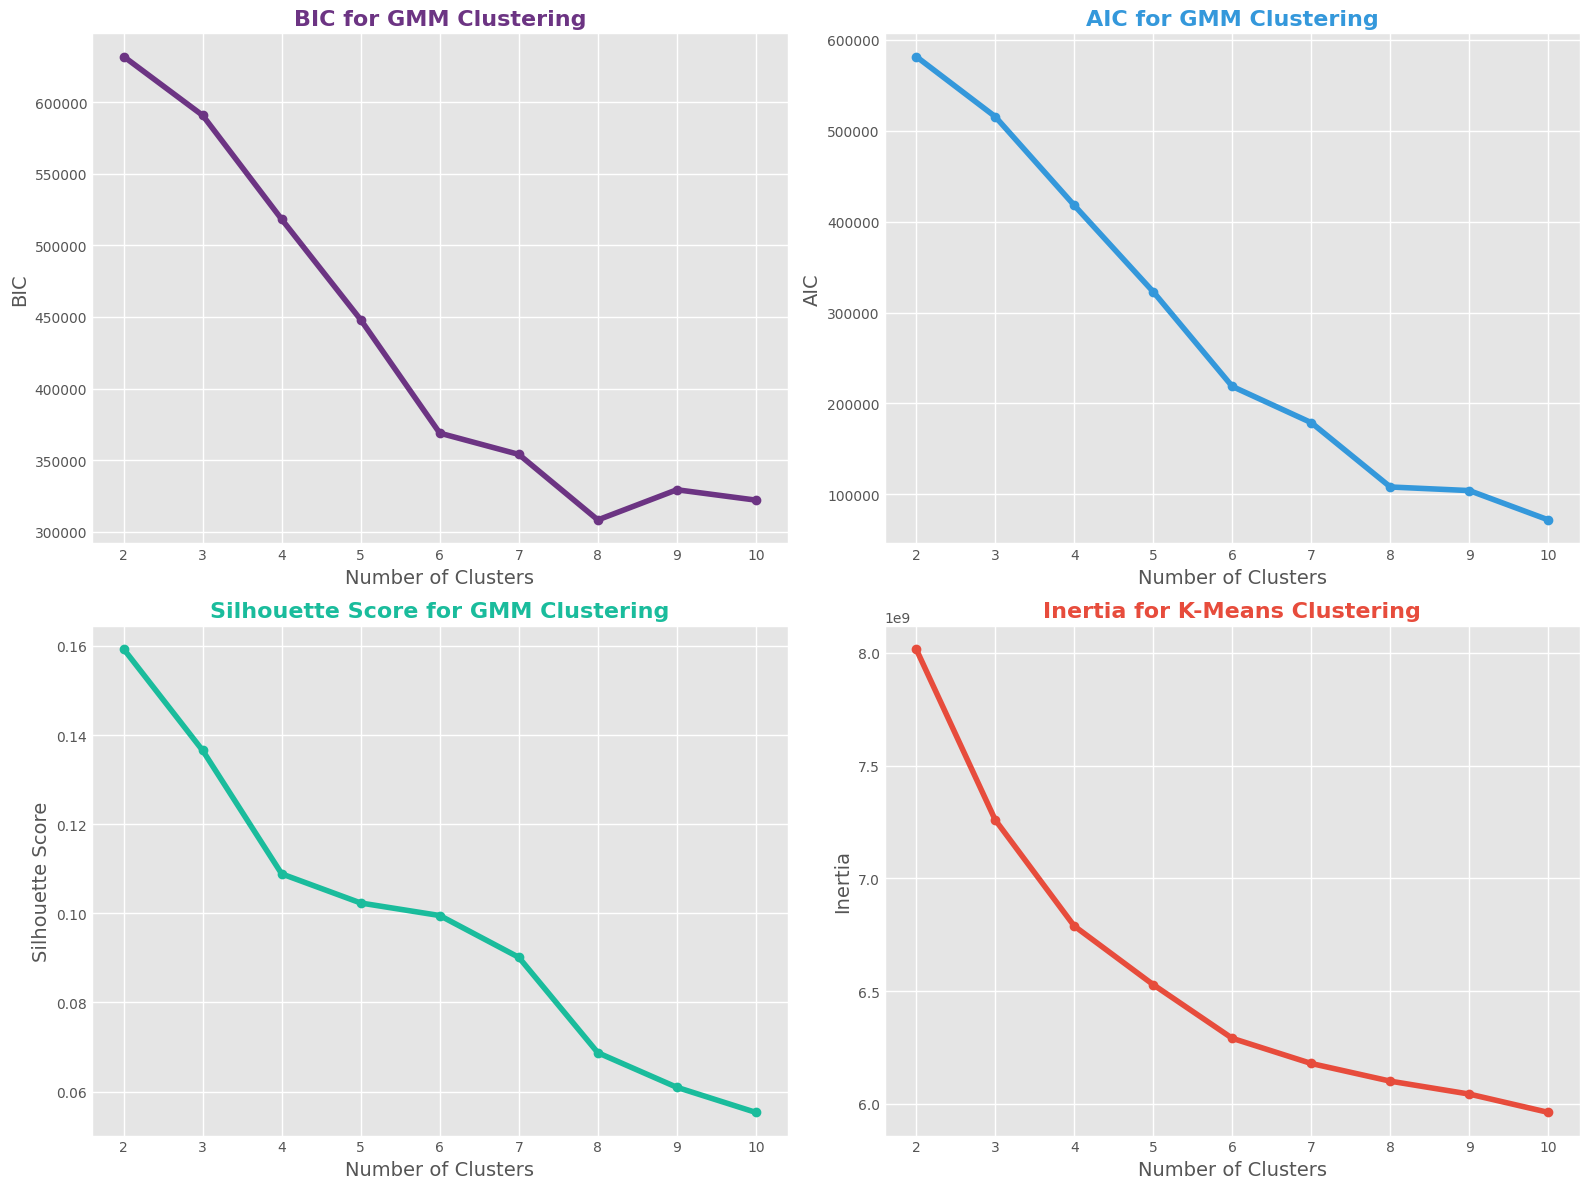

Clustering Accuracy (GMM, 3 Clusters): 0.30


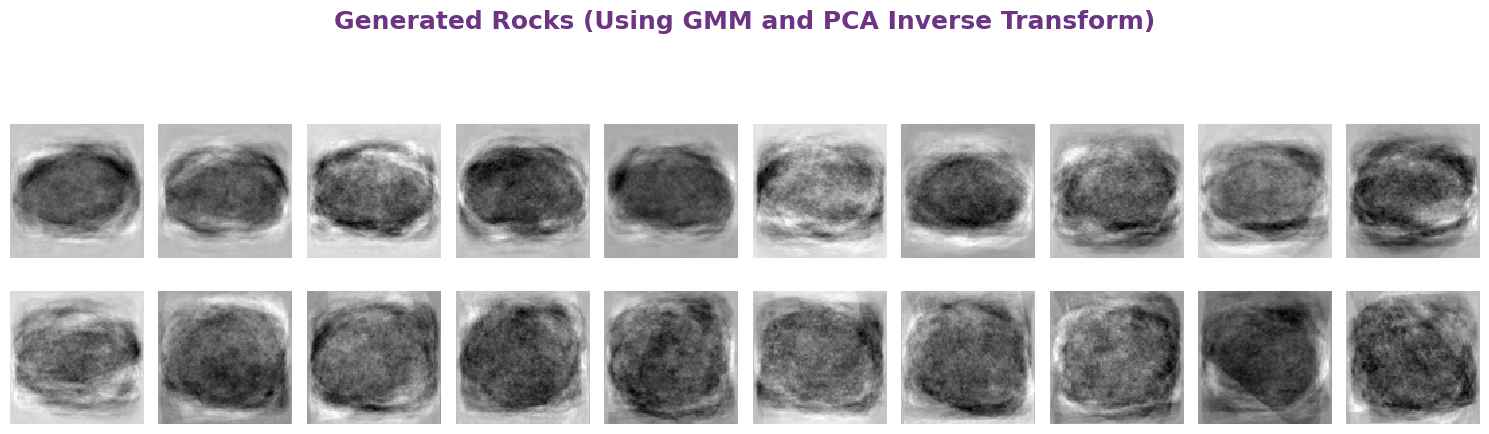

In [79]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming `images_matrix` contains the 360 images data as a matrix

# Step 1: Dimensionality reduction with PCA to retain at least 90% variance
pca = PCA(n_components=0.90, random_state=42)
reduced_data = pca.fit_transform(images_matrix)
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Step 2: Determine the optimal number of clusters using Gaussian Mixture Model (GMM)
num_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10
bic_values = []
aic_values = []

for n_clusters in num_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(reduced_data)
    bic_values.append(gmm.bic(reduced_data))
    aic_values.append(gmm.aic(reduced_data))

# Step 4: Inertia (K-Means for comparison)
inertia_values = []
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    inertia_values.append(kmeans.inertia_)

# Define new color palette
colors = {'bic': '#6C3483', 'aic': '#3498DB', 'silhouette': '#1ABC9C', 'inertia': '#E74C3C'}

# Plot the metrics
plt.style.use('ggplot')  # Apply consistent styling
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# BIC Plot
axes[0, 0].plot(num_clusters, bic_values, marker='o', linestyle='-', color=colors['bic'])
axes[0, 0].set_title("BIC for GMM Clustering", fontsize=16, weight='bold', color=colors['bic'])
axes[0, 0].set_xlabel("Number of Clusters", fontsize=14)
axes[0, 0].set_ylabel("BIC", fontsize=14)
axes[0, 0].grid(True)

# AIC Plot
axes[0, 1].plot(num_clusters, aic_values, marker='o', linestyle='-', color=colors['aic'])
axes[0, 1].set_title("AIC for GMM Clustering", fontsize=16, weight='bold', color=colors['aic'])
axes[0, 1].set_xlabel("Number of Clusters", fontsize=14)
axes[0, 1].set_ylabel("AIC", fontsize=14)
axes[0, 1].grid(True)

# Silhouette Score Plot
silhouette_scores = []  # Replace with the actual silhouette score values if computed earlier
for n_clusters in num_clusters:
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(reduced_data)
    silhouette_scores.append(silhouette_score(reduced_data, cluster_labels))

axes[1, 0].plot(num_clusters, silhouette_scores, marker='o', linestyle='-', color=colors['silhouette'])
axes[1, 0].set_title("Silhouette Score for GMM Clustering", fontsize=16, weight='bold', color=colors['silhouette'])
axes[1, 0].set_xlabel("Number of Clusters", fontsize=14)
axes[1, 0].set_ylabel("Silhouette Score", fontsize=14)
axes[1, 0].grid(True)

# Inertia Plot
axes[1, 1].plot(num_clusters, inertia_values, marker='o', linestyle='-', color=colors['inertia'])
axes[1, 1].set_title("Inertia for K-Means Clustering", fontsize=16, weight='bold', color=colors['inertia'])
axes[1, 1].set_xlabel("Number of Clusters", fontsize=14)
axes[1, 1].set_ylabel("Inertia", fontsize=14)
axes[1, 1].grid(True)

fig.tight_layout()
plt.show()

# Step 3: Set the number of clusters to 3 (as per the question)
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data)

# Step 4: Clustering Accuracy
true_labels = labels  # Extract labels from filenames
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(true_labels)

accuracy = accuracy_score(encoded_true_labels, gmm_labels)
print(f"Clustering Accuracy (GMM, 3 Clusters): {accuracy:.2f}")

# Step 5: Generate 20 new samples using the GMM and inverse transform to original space
new_samples, _ = gmm.sample(20)
new_samples_original_space = pca.inverse_transform(new_samples)

# Step 6: Visualize the generated samples
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(new_samples_original_space[i].reshape(image_size), cmap='gray', interpolation='nearest')
    plt.axis('off')

plt.suptitle("Generated Rocks (Using GMM and PCA Inverse Transform)", fontsize=18, weight='bold', color='#6C3483')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**QUESTION 7:**

Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we
suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock
images using rock name as the label - the category is indicated by the first letter in the filename
(I, M and S). Use images from ‘120 Rocks’ folder as your validation data. Choose the number
of neurons you find appropriate and efficient (so you have enough time to run it), but make the
last layer before the softmax should consist of 8 neurons. The hidden layers should have ReLU
activation function. Train the network for multiple epochs until it converges (if the process is too
slow, tweak the learning rate and consider simplifying your network). We will not deduct points
based on the simplicity of your network, but we expect you to have performance that is above chance
performance that could be obtained with an untrained network - in other words, we expect to see
train and validation loss decrease and accuracy increase throughout the training. We recommend
using Colab (the free version should be totally fine), but make sure to run it with a GPU to speed
up the training - to add a GPU on Colab go to Edit->Notebook settings).

1. Report the training time (use code to do this). [1 point]
2. Plot training and validation loss and accuracy as a function of training epochs. [13 points]
3. How many parameters does the network have? How many of those parameters are bias parameters? [1 points]
4. Compare the activity of neurons in the next to the last layer (the one with 8 neurons) with
the human data. (to get human data use mds_360.txt and mds_120.txt files). Similar to before,
use Procrustes analysis to do the comparison. For training and validation data (separately), report
disparity and compute the correlation coefficient between each dimension of mtx1 and mtx2. Display
results in a table. [3 points]

In [62]:


# Define paths
zip_file_path = "/content/120 Rocks.zip"  # Update with your ZIP file name if different
extraction_path = "/content/120_Rocks"  # Folder to extract images

# Step 1: Unzip the dataset
if not os.path.exists(extraction_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)



In [63]:
import os
import numpy as np
from PIL import Image

# Define directories for training and validation datasets
train_directory = '360_Rocks'
val_directory = '120_Rocks'

# Function to load and preprocess images from a given directory
def preprocess_images(directory, target_size=(100, 100)):
    """
    Load and preprocess images by resizing, normalizing, and labeling.

    Args:
    - directory (str): Path to the directory containing images.
    - target_size (tuple): Desired image size as (width, height).

    Returns:
    - images (np.array): Preprocessed image data as a NumPy array.
    - labels (np.array): Corresponding labels for the images.
    """
    images, labels = [], []

    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)

        # Load image, convert to grayscale, and resize
        image = Image.open(file_path).convert('L')  # Grayscale conversion
        image = image.resize(target_size)
        images.append(np.array(image) / 255.0)  # Normalize pixel values

        # Derive label from the filename
        label_char = file_name[0]
        label = 0 if label_char == 'I' else 1 if label_char == 'M' else 2
        labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess training and validation datasets
X_train, y_train = preprocess_images(train_directory)
X_val, y_val = preprocess_images(val_directory)

# Reshape image data to include channel dimension for compatibility with deep learning models
X_train = X_train.reshape(-1, 100, 100, 1)  # Adding channel dimension
X_val = X_val.reshape(-1, 100, 100, 1)  # Adding channel dimension

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}")

Training data shape: (360, 100, 100, 1), Training labels shape: (360,)
Validation data shape: (120, 100, 100, 1), Validation labels shape: (120,)


In [64]:
import time
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a more complex CNN model
def build_model():
    model = models.Sequential()

    # Convolutional Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Additional Conv2D layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Additional Conv2D layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Block 4 (Optional, for deeper networks)
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Increase filters for complexity
    model.add(layers.MaxPooling2D((2, 2)))  # Pooling for further downsampling

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))  # Larger dense layer for complexity
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))  # Additional Dropout layer

    # Latent and Output Layers
    model.add(layers.Dense(8, activation='relu'))  # Latent layer
    model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes

    return model

# Build and compile the model
model = build_model()
model.compile(optimizer=Adam(learning_rate=0.0001),  # Smaller learning rate for stable training
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)  # Fit augmentation parameters to training data

# Record training start time
start_time = time.time()

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Augmented training data
    epochs=17,
    validation_data=(X_val, y_val)
)

# Record training end time
end_time = time.time()
training_time = end_time - start_time

# Display training time
print(f"Training Time: {training_time:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/17


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3508 - loss: 1.0984 - val_accuracy: 0.3417 - val_loss: 1.0999
Epoch 2/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3388 - loss: 1.0999 - val_accuracy: 0.3333 - val_loss: 1.0992
Epoch 3/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3480 - loss: 1.1024 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3108 - loss: 1.0995 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 5/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3881 - loss: 1.0976 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 6/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.2990 - loss: 1.0990 - val_accuracy: 0.3417 - val_loss: 1.0986
Epoch 7/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.3460 - loss: 1.0994 - val_accuracy: 0.3667 - val_loss: 1.0985
Epoch 8/17
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.3560 - loss: 1.0982 - val_accuracy: 0.3333 - val_loss: 1.0985
Epo

Training Time: 315.47 seconds


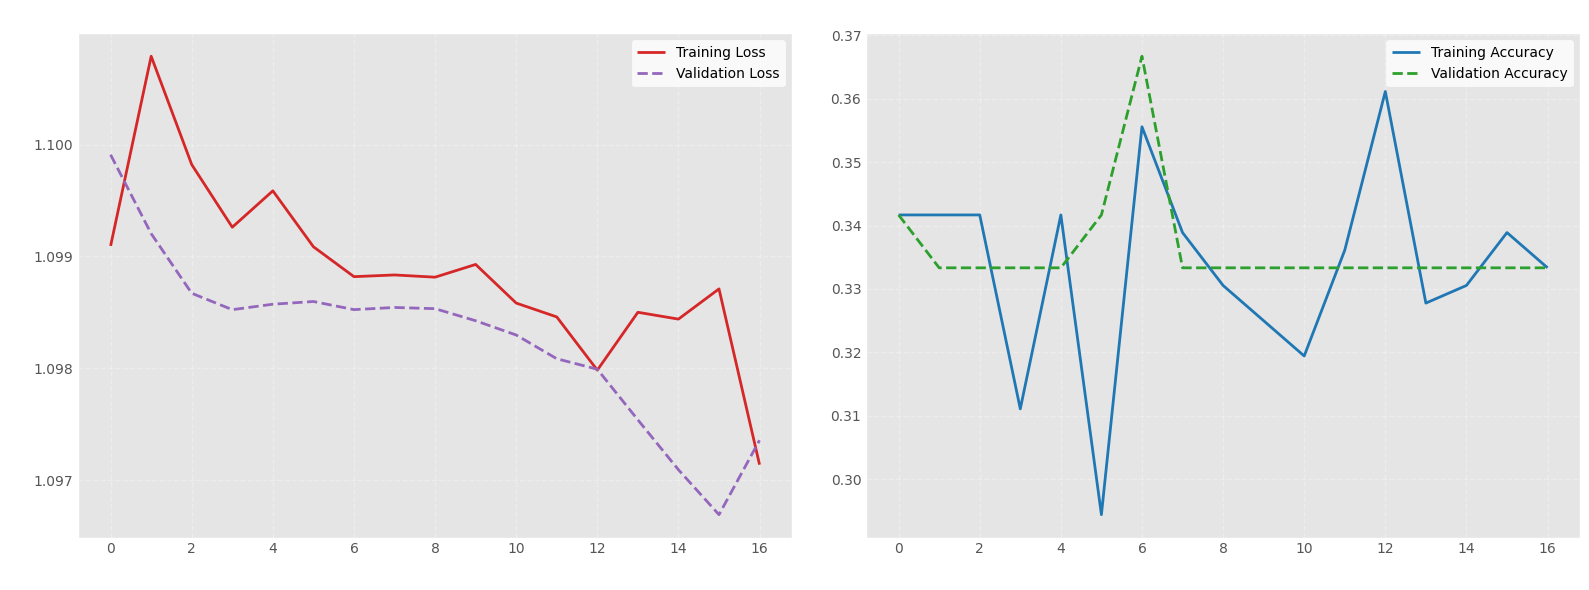

In [69]:
import matplotlib.pyplot as plt

print(f"Training Time: {training_time:.2f} seconds")

# Define a dark-themed color palette
# plt.style.use('dark_background')
colors = ['#D62728', '#9467BD', '#1F77B4', '#2CA02C']  # Dark-themed palette

# Create the plot figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot loss
axes[0].plot(history.history['loss'], color=colors[0], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], color=colors[1], label='Validation Loss', linestyle='--', linewidth=2)
axes[0].set_title('Training vs Validation Loss', fontsize=14, weight='bold', color='white')
axes[0].set_xlabel('Epochs', fontsize=12, color='white')
axes[0].set_ylabel('Loss', fontsize=12, color='white')
axes[0].legend(fontsize=10, facecolor='white', edgecolor='white')
axes[0].grid(True, linestyle='--', alpha=0.3)

# Plot accuracy
axes[1].plot(history.history['accuracy'], color=colors[2], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], color=colors[3], label='Validation Accuracy', linestyle='--', linewidth=2)
axes[1].set_title('Training vs Validation Accuracy', fontsize=14, weight='bold', color='white')
axes[1].set_xlabel('Epochs', fontsize=12, color='white')
axes[1].set_ylabel('Accuracy', fontsize=12, color='white')
axes[1].legend(fontsize=10, facecolor='white', edgecolor='white')
axes[1].grid(True, linestyle='--', alpha=0.3)

# Adjust layout and show the plots
fig.tight_layout()
plt.show()

In [70]:
# Calculate the total number of parameters in the model
total_params = model.count_params()

# Calculate the number of bias parameters specifically
bias_params = np.sum([np.prod(p.shape) for p in model.trainable_weights if len(p.shape) == 1])

# Print results with enhanced clarity
print("=" * 50)
print("Model Parameters Summary")
print("=" * 50)
print(f"Total Number of Parameters: {total_params:,}")
print(f"Number of Bias Parameters: {bias_params:,}")
print("=" * 50)

Model Parameters Summary
Total Number of Parameters: 1,168,707
Number of Bias Parameters: 1,035


In [73]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import time
from scipy.spatial import procrustes
import pandas as pd

# Function to load and preprocess image data
def preprocess_images(directory, image_size=(100, 100)):
    """
    Load and preprocess images from a given directory.

    Args:
        directory (str): Path to the image directory.
        image_size (tuple): Target size for image resizing (default is 100x100).

    Returns:
        tuple: Normalized image data and their corresponding labels.
    """
    images, labels = [], []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        image = Image.open(file_path).convert('L').resize(image_size)  # Convert to grayscale and resize
        images.append(np.array(image) / 255.0)  # Normalize pixel values to [0, 1]
        # Determine label from filename
        labels.append(0 if filename.startswith('I') else 1 if filename.startswith('M') else 2)
    return np.array(images), np.array(labels)

# Paths to training and validation datasets
train_path = '360_Rocks'
val_path = '120_Rocks'

# Load and preprocess the datasets
X_train, y_train = preprocess_images(train_path)
X_val, y_val = preprocess_images(val_path)

# Expand dimensions to include the channel for grayscale images
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]

# Build a CNN model using the Functional API
input_layer = tf.keras.Input(shape=(100, 100, 1))
conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = tf.keras.layers.MaxPooling2D((2, 2))(conv1)
conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D((2, 2))(conv2)
conv3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu')(pool2)
flatten = tf.keras.layers.Flatten()(conv3)
dense1 = tf.keras.layers.Dense(64, activation='relu')(flatten)
latent_layer = tf.keras.layers.Dense(8, activation='relu')(dense1)  # Latent space
output_layer = tf.keras.layers.Dense(3, activation='softmax')(latent_layer)

# Compile the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for one epoch to initialize weights
model.fit(X_train, y_train, epochs=1, validation_data=(X_val, y_val))

# Extract features from the next-to-last layer
feature_extractor = tf.keras.Model(inputs=model.input, outputs=latent_layer)

# Generate activations for training and validation datasets
train_features = feature_extractor.predict(X_train)
val_features = feature_extractor.predict(X_val)

# Load human-provided MDS data for comparison
human_train_mds = np.loadtxt('mds_360.txt')
human_val_mds = np.loadtxt('mds_120.txt')

# Perform Procrustes analysis for training data
aligned_train_human, aligned_train_model, train_disparity = procrustes(human_train_mds, train_features)
print(f"Training Data Disparity: {train_disparity:.4f}")

# Perform Procrustes analysis for validation data
aligned_val_human, aligned_val_model, val_disparity = procrustes(human_val_mds, val_features)
print(f"Validation Data Disparity: {val_disparity:.4f}")

# Compute correlations for each latent dimension
train_correlations = [np.corrcoef(aligned_train_human[:, i], aligned_train_model[:, i])[0, 1] for i in range(8)]
val_correlations = [np.corrcoef(aligned_val_human[:, i], aligned_val_model[:, i])[0, 1] for i in range(8)]

# Create a DataFrame to summarize correlations
correlation_summary = pd.DataFrame({
    "Dimension": range(1, 9),
    "Training Correlation": train_correlations,
    "Validation Correlation": val_correlations
})

# Display correlation table
print("Correlation Summary:")
print(correlation_summary)


12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 492ms/step - accuracy: 0.3024 - loss: 1.1171 - val_accuracy: 0.3333 - val_loss: 1.0981
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Training Data Disparity: 0.9945
Validation Data Disparity: 0.9869
Correlation Summary:
   Dimension  Training Correlation  Validation Correlation
0          1              0.137774                0.011856
1          2              0.002197                0.025955
2          3              0.032191                0.189085
3          4              0.016658                0.034774
4          5              0.031099                0.122849
5          6              0.085311                0.209779
6          7              0.085307                0.053520
7          8              0.035987                0.031646
